# Simplest simulation of confidence reduction

**with one parameter!!!**

- Two estimators
- Each one has a probability distribution
- They exchange their estimates
    - by the naive
    - by the conservative data exchange
- What if they repeated the exchange multiple times?
- What if the exchanged data gains some noises?



In [27]:
import random
import math
import matplotlib.pyplot as plt
import statistics
import numpy as np

## make one distribution

N: 1000
sum: 0.9999994265729685


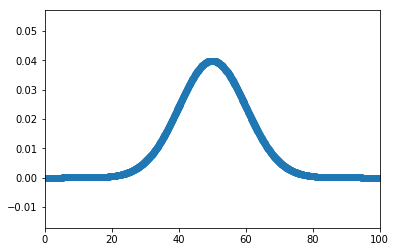

max at 50.0


In [28]:
x_max = 100
x_min = 0
dlt = 0.1
N = int((x_max-x_min)/dlt)
print('N: ' + str(N))
x_axis = [x_min + i * dlt for i in range(N)]

def p(x, mean, sigma):
    return math.exp(-0.5*(x - mean)**2 / sigma / sigma) / math.sqrt(2*math.pi*sigma*sigma)


dist = [p(x, 50, 10) for x in x_axis]
print('sum: ' + str(sum(dist)*dlt))

plt.scatter(x_axis, dist)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(dist)*dlt))


# interaction functions

In [29]:
def combine(p1, p2, off = 0):
    ans = []
    for i in range(len(p1)):
        if i + off < 0:
            ans.append(p1[i]*p2[0])
        elif len(p2) <= i + off:
            ans.append(p1[i]*p2[-1])
        else:
            ans.append(p1[i]*p2[i+off])
    
    # cheating part... #
#     temp_min = -1
#     for i in range(len(ans)):
#         if ans[i] != 0 and (temp_min -1 or temp_min > ans[i]):
#             temp_min = ans[i]
#     for i in range(len(ans)):
#         if ans[i] == 0:
#             ans[i] = temp_min/1000.0
    # cheating part... #

    total = sum(ans)*dlt
    for i in range(len(ans)):
        ans[i] /= total
    return ans

def divide(p, omega):
    ans1 = []
    ans2 = []
    for i in range(len(p)):
        ans1.append(math.pow(p[i], omega))
        ans2.append(math.pow(p[i], 1-omega))
    total1 = sum(ans1)*dlt
    total2 = sum(ans2)*dlt
    for i in range(len(ans1)):
        ans1[i] /= total1
        ans2[i] /= total2
    return [ans1, ans2]

# repeated interactions

In [30]:
n_interactions = 10

# noises

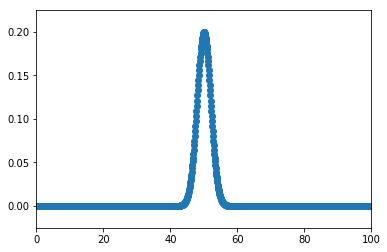

1.0


In [31]:
noise_sigma = 2
noise_mean = (x_min+x_max)/2.0
p_noise = [p(x, noise_mean, noise_sigma) for x in x_axis]
noise_mean_indx = len(p_noise)//2
plt.scatter(x_axis, p_noise)
plt.xlim(x_min, x_max)
plt.show()
print(sum(p_noise)*dlt)



# Convolution

In [32]:
def conv(p1, p2, position):
    ans = [0] * len(p1)
    for i in range(len(p1)):
        for j in range(len(p2)):
            k = j - i + position
            if 0 <= k and k < len(p2):
                ans[i] += p1[j] * p2[k]
    total = sum(ans)*dlt
    for i in range(len(ans)):
        ans[i] /= total
    return ans

# entropy

In [33]:
def entropy(p):
    ans = 0
    for i in range(len(p)):
        if p[i] > 0:
            ans -= p[i]*dlt * math.log2(p[i]*dlt)
    return ans

def D_KL(p,q):
    ans = 0
    for i in range(len(p)):
        ans += p[i]*dlt * math.log2(p[i]/q[i])
    return ans

def cross_entropy(p,q):
    return entropy(p) + D_KL(p,q)

# https://stats.stackexchange.com/questions/97938/calculate-the-kullback-leibler-divergence-in-practice
def D_CUSTOM(p, q):
    ans = 0
    for i in range(len(p)):
        if p[i] > 0 or q[i] > 0:
            ave = (p[i]+q[i])/2.0
            if p[i] > 0:
                ans += p[i]*dlt * math.log2(p[i]/ave)
            if q[i] > 0:
                ans += q[i]*dlt * math.log2(q[i]/ave)
    return ans/2.0

# naive with noises

0 iterations done...
5 iterations done...
1.0000000000000009


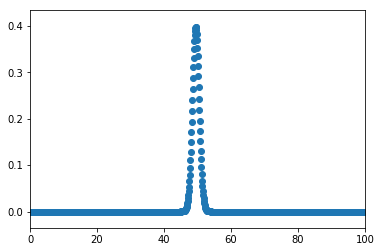

max at 49.5


In [34]:
p = list(dist)

H = [entropy(p)]
D = [D_CUSTOM(dist, p)]
MAP = [np.argmax(p)*dlt]

for i in range(n_interactions):
    p_temp = conv(p, p_noise, noise_mean_indx)
    noise = random.gauss(noise_mean, noise_sigma)
    p = combine(p, p_temp, int((noise-noise_mean)/dlt+0.5))
    
    H += [entropy(p)]
    D += [D_CUSTOM(dist, p)]
    MAP += [np.argmax(p)*dlt]

    if i % 5 == 0:
        print(str(i) + ' iterations done...')

print(sum(p)*dlt)

plt.scatter(x_axis, p)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p)*dlt))


min(H(p)): 5.371689041247986


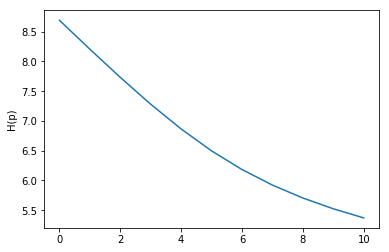

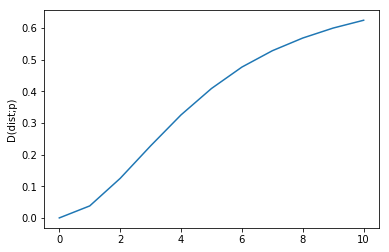

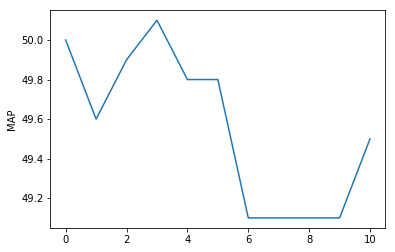

In [35]:
plt.plot(H)
plt.ylabel('H(p)')
print('min(H(p)): ' + str(min(H)))
plt.show()
plt.plot(D)
plt.ylabel('D(dist;p)')
plt.show()
plt.plot(MAP)
plt.ylabel('MAP')
plt.show()

# Conservative with noises

0 iterations done...
5 iterations done...
0.9999999999999987


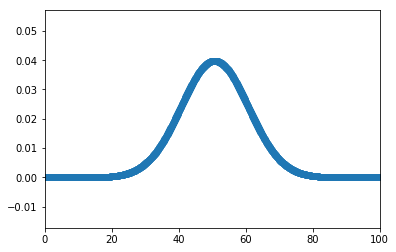

max at 50.7


In [36]:
p = list(dist)

H = [entropy(p)]
D = [D_CUSTOM(dist, p)]
MAP = [np.argmax(p)*dlt]

omega = 0.9
for i in range(n_interactions):
    p_omega, p_1_omega = divide(p, omega)
    
    p_to_pass = conv(p_1_omega, p_noise, noise_mean_indx)
    noise = random.gauss(noise_mean, noise_sigma)

    p = combine(p_omega, p_to_pass, int((noise-noise_mean)/dlt+0.5))

    H += [entropy(p)]
    D += [D_CUSTOM(dist, p)]
    MAP += [np.argmax(p)*dlt]

    if i % 5 == 0:
        print(str(i) + ' iterations done...')

print(sum(p)*dlt)
plt.scatter(x_axis, p)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p)*dlt))

min(H(p)): 8.690936064948254


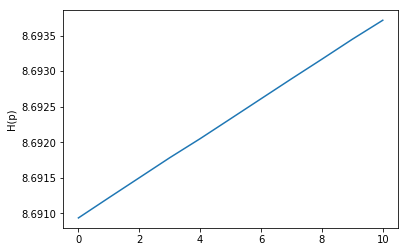

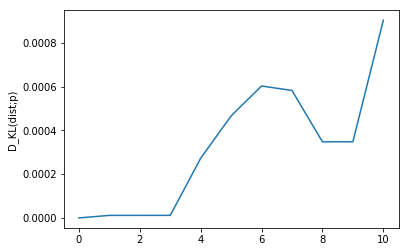

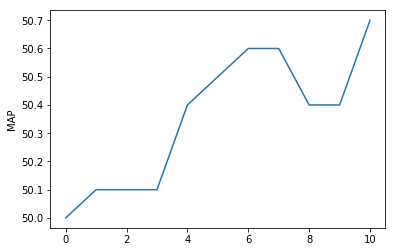

In [37]:
plt.plot(H)
plt.ylabel('H(p)')
print('min(H(p)): ' + str(min(H)))
plt.show()
plt.plot(D)
plt.ylabel('D_KL(dist;p)')
plt.show()
plt.plot(MAP)
plt.ylabel('MAP')
plt.show()

# Conservative with noise (diving noise)

0 iterations done...
5 iterations done...
1.0000000000000009


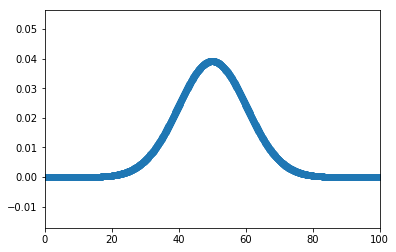

max at 50.0


In [38]:
p = list(dist)
H = [entropy(p)]
D = [D_CUSTOM(dist, p)]
MAP = [np.argmax(p)*dlt]

omega = 0.9
for i in range(n_interactions):
    p_omega, p_1_omega = divide(p, omega)
    
    p_noise_div, p_noise_div2 = divide(p_noise, 1 - omega)
    p_to_pass = conv(p_1_omega, p_noise_div, noise_mean_indx)
    noise = random.gauss(noise_mean, noise_sigma)

    p = combine(p_omega, p_to_pass, int((noise-noise_mean)/dlt+0.5))

    H += [entropy(p)]
    D += [D_CUSTOM(dist, p)]
    MAP += [np.argmax(p)*dlt]

    if i % 5 == 0:
        print(str(i) + ' iterations done...')

print(sum(p)*dlt)
plt.scatter(x_axis, p)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p)*dlt))

min(H(p)): 8.690936064948254


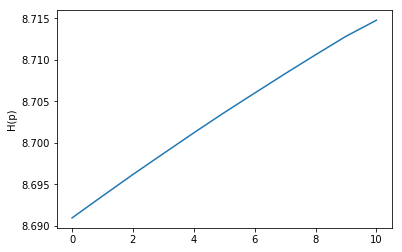

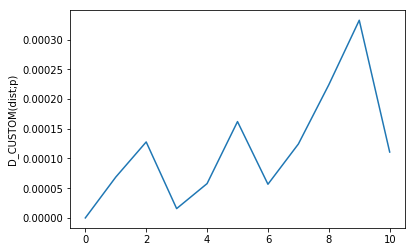

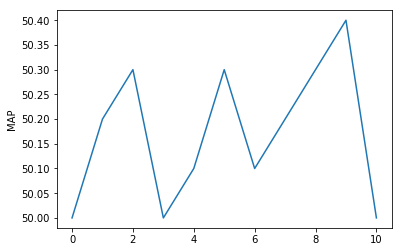

In [39]:
plt.plot(H)
plt.ylabel('H(p)')
print('min(H(p)): ' + str(min(H)))
plt.show()
plt.plot(D)
plt.ylabel('D_CUSTOM(dist;p)')
plt.show()
plt.plot(MAP)
plt.ylabel('MAP')
plt.show()

# Conservative with noise (but noise is ignored for est)

0 iterations done...
5 iterations done...
1.0000000000000002


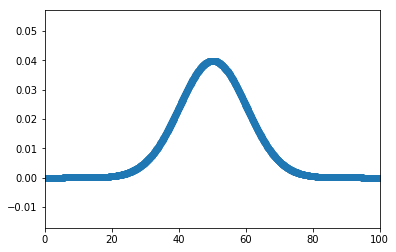

max at 50.2


In [43]:
p = list(dist)
H = [entropy(p)]
D = [D_CUSTOM(dist, p)]
MAP = [np.argmax(p)*dlt]

omega = 0.9
for i in range(n_interactions):
    p_omega, p_1_omega = divide(p, omega)
    
    
    p_to_pass = p_1_omega #conv(p1_1_omega, p_noise2, noise_mean_indx)
    noise = random.gauss(noise_mean, noise_sigma)

    p = combine(p_omega, p_to_pass, int((noise-noise_mean)/dlt+0.5))
    
    H += [entropy(p)]
    D += [D_CUSTOM(dist, p)]
    MAP += [np.argmax(p)*dlt]

    if i % 5 == 0:
        print(str(i) + ' iterations done...')

print(sum(p)*dlt)
plt.scatter(x_axis, p)
plt.xlim(x_min, x_max)
plt.show()
print("max at " + str(np.argmax(p)*dlt))

min(H(p)): 8.690936064948254


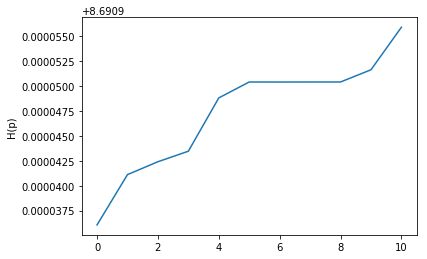

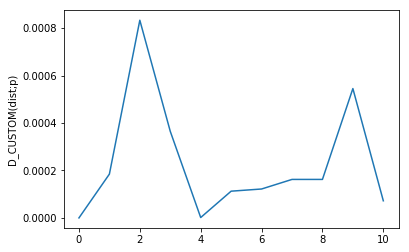

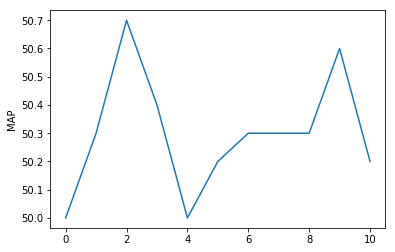

In [44]:
plt.plot(H)
plt.ylabel('H(p)')
print('min(H(p)): ' + str(min(H)))
plt.show()
plt.plot(D)
plt.ylabel('D_CUSTOM(dist;p)')
plt.show()
plt.plot(MAP)
plt.ylabel('MAP')
plt.show()